Los datos publicados comienzan a partir de la fila 5. Además, la columna 5 está vacía, y las últimas filas hay que eliminarlas porque son una nota al pie.

In [81]:
import pandas as pd
import numpy as np
from collections import Counter
from itertools import chain
import math
import matplotlib.pyplot as plt
serie_mensual = './datos/serie_mensual_indices_comex.xls'
Intercambio_comercial = "./datos/Serie Intercambio comercial.csv"

desde = 2011
hasta = 2021

df = pd.read_excel(serie_mensual, header=None, skiprows = 5)
df= df.rename(columns = {0:'Año', 1: 'Mes', 2:'iv_x', 3:'ip_x', 4:'iq_x', 5:'del',6:'iv_m',7:'ip_m',8:'iq_m'})
df = df.drop(columns="del")
df = df[df['Mes'].notna()]
df


,Año,Mes,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,2004,Enero,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
1,NaN,Febrero,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102
2,NaN,Marzo,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418
3,NaN,Abril,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000
4,NaN,Mayo,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957
...,...,...,...,...,...,...,...,...
211,NaN,Agosto,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,NaN,Septiembre,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,NaN,Octubre,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674
214,NaN,Noviembre,213.978974,188.487150,112.165872,308.250830,134.263976,229.640959


In [82]:
def variacion_interanual (df, nombre_columna: str):
    variaciones = []
    for i in range(len(df)):
        fila = df.iloc[[i]]
        fila[nombre_columna]
    


In [83]:
#Más fácil para trabajar, lo hago todo lista
mes = df.Mes.tolist()
iv_x = df.iv_x.tolist()
ip_x = df.ip_x.tolist()
iq_x = df.iq_x.tolist()
iv_m = df.iv_m.tolist()
ip_m = df.ip_m.tolist()
iq_m = df.iq_m.tolist()
año = df.Año.tolist()

In [84]:
#Agarro los primeros 3 caracteres y los convierto en minúscula
mes_in=[]
for i in mes:
    mes_in.append(i[:3].lower())

#Reemplazo el mes original
mes = mes_in[:]
mes[:2]

['ene', 'feb']

La columna año: los primeros 12 meses corresponde al 2004, los siguientes 12 al 2004+1. Para hasta que de el largo de los meses publicados.

In [85]:
años=[]
arranque = int(df['Año'][0])
for i in range(len(mes)):
    if ((i % 12 == 0) and (i != 0)):       
        arranque+=1
        años.append(arranque)
    else:
        años.append(arranque)

años[:13]

[2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2005]

Calculo las medias por mes, hago listas y tengo que repetirlas dadas las observaciones.
Hay que tener en cuenta que están ordenadas por mes. La DF todavía no. 

Creo una df con el resto de las variables (falta ordenarlas)

In [86]:
mes_num=[]

nombre_meses = ['ene','feb','mar','abr','may','jun','jul','ago','sep','oct','nov','dic']

for i in mes:
    mes_num.append(nombre_meses.index(i)+1)


In [87]:
df_todo = pd.DataFrame()
df_todo['Mes_num']=mes_num
df_todo['Mes']=mes
df_todo['Año']=años
df_todo['iv_x']=iv_x
df_todo['ip_x']=ip_x
df_todo['iq_x']=iq_x
df_todo['iv_m']=iv_m
df_todo['ip_m']=ip_m
df_todo['iq_m']=iq_m

#df_todo = df_todo.loc[(df_todo['Año'] >= desde) & (df_todo['Año'] <= hasta)]
df_todo

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480
1,2,feb,2004,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102
2,3,mar,2004,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418
3,4,abr,2004,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000
4,5,may,2004,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957
...,...,...,...,...,...,...,...,...,...
211,8,ago,2021,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319
212,9,sep,2021,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000
213,10,oct,2021,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674
214,11,nov,2021,213.978974,188.487150,112.165872,308.250830,134.263976,229.640959


In [88]:
df_todo['iv_x_var']=df_todo['iv_x'].pct_change(periods=12, fill_method='bfill')
df_todo['ip_x_var']=df_todo['ip_x'].pct_change(periods=12, fill_method='bfill')
df_todo['iq_x_var']=df_todo['iq_x'].pct_change(periods=12, fill_method='bfill')
df_todo['iv_m_var']=df_todo['iv_m'].pct_change(periods=12, fill_method='bfill')
df_todo['ip_m_var']=df_todo['ip_m'].pct_change(periods=12, fill_method='bfill')
df_todo['iq_m_var']=df_todo['iq_m'].pct_change(periods=12, fill_method='bfill')
df_todo

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,ip_x_var,iq_x_var,iv_m_var,ip_m_var,iq_m_var
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,NaN,NaN,NaN,NaN,NaN,NaN
1,2,feb,2004,83.123100,98.637791,84.271048,72.909655,95.365049,76.453102,NaN,NaN,NaN,NaN,NaN,NaN
2,3,mar,2004,92.234875,98.699014,93.490321,90.356176,96.687437,93.481418,NaN,NaN,NaN,NaN,NaN,NaN
3,4,abr,2004,105.498772,101.221201,104.331206,88.261413,97.878611,90.232000,NaN,NaN,NaN,NaN,NaN,NaN
4,5,may,2004,117.807332,104.373216,113.006773,95.814740,99.755942,96.115957,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,8,ago,2021,281.082321,188.625264,149.016264,307.609099,136.040804,226.115319,0.634608,0.298305,0.259556,0.640049,0.231586,0.330064
212,9,sep,2021,262.137604,189.164260,138.576708,314.682965,132.452925,237.383000,0.598011,0.296841,0.232643,0.425518,0.190114,0.195735
213,10,oct,2021,238.175253,193.338718,123.190665,280.534623,132.264843,212.100674,0.468230,0.281967,0.145988,0.310353,0.190904,0.100447
214,11,nov,2021,213.978974,188.487150,112.165872,308.250830,134.263976,229.640959,0.369957,0.231368,0.099875,0.401212,0.212295,0.156247


In [89]:
medias = df_todo.groupby(['Mes_num']).mean()
v_expo_media = medias.iv_x.tolist()
p_expo_media = medias.ip_x.tolist()
q_expo_media = medias.iq_x.tolist()
iv_impo_media = medias.iv_m.tolist()
p_impo_media = medias.ip_m.tolist()
q_impo_media = medias.iq_m.tolist()

del medias['Año']
medias

,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,ip_x_var,iq_x_var,iv_m_var,ip_m_var,iq_m_var
Mes_num,,,,,,,,,,,,
1,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071,0.065821,0.038604,0.020994,0.082205,0.011704,0.063614
2,145.730184,152.697208,95.243495,199.813691,120.467839,163.178401,0.055682,0.039922,0.013760,0.089868,0.012641,0.071208
3,163.638666,153.875927,106.245209,228.060957,122.164446,184.257528,0.057216,0.041624,0.016305,0.103180,0.015385,0.081504
4,182.921097,153.088729,119.243997,225.052416,123.496430,179.643302,0.055318,0.043870,0.010979,0.111748,0.016886,0.082965
5,200.213752,153.899631,129.580027,248.588212,125.224484,195.229521,0.057372,0.045786,0.015303,0.116850,0.019055,0.080259
6,192.354311,156.118546,122.081638,255.102614,126.563429,198.543844,0.063769,0.045541,0.019983,0.099534,0.022530,0.062123
7,193.858161,155.406432,123.759440,265.459872,125.421581,208.266043,0.072482,0.047508,0.020324,0.106067,0.020442,0.068524
8,199.457743,155.177877,127.121702,267.469141,124.327436,212.397582,0.094045,0.047387,0.033763,0.105203,0.022186,0.068641
9,189.880217,155.339964,121.333862,253.266065,121.922035,205.531817,0.081170,0.047075,0.026880,0.090429,0.020590,0.061479


In [90]:
cantidadMuestrasMes = Counter(df_todo['Mes'])
cantidadMuestrasMes

Counter({'ene': 18,
         'feb': 18,
         'mar': 18,
         'abr': 18,
         'may': 18,
         'jun': 18,
         'jul': 18,
         'ago': 18,
         'sep': 18,
         'oct': 18,
         'nov': 18,
         'dic': 18})

In [91]:
#Crear una variable que repita 12 veces cada mes. 
def lista_append_media(variable):
    lista = []
    for i in range(12):
        media = [variable[i]]*list(cantidadMuestrasMes.values())[i]
        lista.append(media)
    
    lista = list(chain(*lista))

    return lista

In [92]:
iv_expo_media_final = lista_append_media(v_expo_media)
p_expo_media_final = lista_append_media(p_expo_media)
q_expo_media_final = lista_append_media(q_expo_media)
iv_impo_media_final = lista_append_media(iv_impo_media)
p_impo_media_final = lista_append_media(p_impo_media)
q_impo_media_final = lista_append_media(q_impo_media)


In [93]:
df_todo_ordered=df_todo.sort_values(['Mes_num', 'Año'])
df_todo_ordered


,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,ip_x_var,iq_x_var,iv_m_var,ip_m_var,iq_m_var
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,NaN,NaN,NaN,NaN,NaN,NaN
12,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232,0.197487,-0.008923,0.209535,0.181799,0.111310,0.063986
24,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030,0.146138,0.125122,0.018784,0.222316,0.049819,0.163656
36,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818,0.063378,0.134083,-0.062914,0.270009,0.051005,0.208170
48,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012,0.716549,0.317398,0.300472,0.517608,0.072607,0.414174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,0.044343,-0.057938,0.167829,0.007565,0.158129
179,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,-0.038206,0.212983,-0.270048,0.016801,-0.280900
191,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,-0.002270,0.003902,-0.200111,-0.047453,-0.164618
203,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,-0.004297,-0.333954,0.247322,-0.042022,0.310406


In [94]:
df_todo_ordered['iv_expo_media']= iv_expo_media_final
df_todo_ordered['p_expo_media']= p_expo_media_final
df_todo_ordered['q_expo_media']= q_expo_media_final
df_todo_ordered['iv_impo_media']= iv_impo_media_final
df_todo_ordered['p_impo_media']= p_impo_media_final
df_todo_ordered['q_impo_media']= q_impo_media_final
df_todo_ordered = df_todo_ordered.reset_index(drop=True)
df_todo_ordered

,Mes_num,Mes,Año,iv_x,ip_x,iq_x,iv_m,ip_m,iq_m,iv_x_var,...,iq_x_var,iv_m_var,ip_m_var,iq_m_var,iv_expo_media,p_expo_media,q_expo_media,iv_impo_media,p_impo_media,q_impo_media
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,NaN,...,NaN,NaN,NaN,NaN,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
1,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232,0.197487,...,0.209535,0.181799,0.111310,0.063986,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
2,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030,0.146138,...,0.018784,0.222316,0.049819,0.163656,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
3,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818,0.063378,...,-0.062914,0.270009,0.051005,0.208170,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
4,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012,0.716549,...,0.300472,0.517608,0.072607,0.414174,147.924014,152.003232,97.294630,209.861516,118.414699,174.664071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,...,-0.057938,0.167829,0.007565,0.158129,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
212,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,...,0.212983,-0.270048,0.016801,-0.280900,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
213,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,...,0.003902,-0.200111,-0.047453,-0.164618,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802
214,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,...,-0.333954,0.247322,-0.042022,0.310406,163.584865,153.602663,106.735025,220.606514,121.475202,179.690802


#Sistema de consulta

In [95]:
### Loop the data lines
with open(Intercambio_comercial, 'r') as temp_f:
    # get No of columns in each line
    col_count = [ len(l.split(",")) for l in temp_f.readlines() ]

### Generate column names  (names will be 0, 1, 2, ..., maximum columns - 1)
column_names = ['Año', 'Mes', 'v_expo', 'v_impo','Intercambio_comercial']

### Read csv
df_consulta = pd.read_csv(Intercambio_comercial, header=None, delimiter=";", names=column_names, skiprows = 1)
df_consulta

,Año,Mes,v_expo,v_impo,Intercambio_comercial
0,2002,1,1817821769,850579913,967241856
1,2002,2,1781933597,627759578,1154174019
2,2002,3,2112397988,592890030,1519507958
3,2002,4,2181683896,612000097,1569683799
4,2002,5,2369474217,861772801,1507701416
...,...,...,...,...,...
235,2021,8,"8098856231,98","5753643988,37","2345212243,61"
236,2021,9,"7570189290,44","5885682051,41","1684507239,03"
237,2021,10,"6862570097,27","5247232136,26","1615337961,01"
238,2021,11,"6191000000,00","5757000000,00",11948000000


In [96]:
minimo = df_todo.Año[0]
maximo = df_todo.Año[len(df_todo)-1]

In [97]:
#Filtro
df_consulta_fil= df_consulta.loc[( df_consulta.Año >= minimo)&(df_consulta.Año <= maximo)]

df_consulta_fil


,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322450679,1608575067,713875612
25,2004,2,2395035139,1363731431,1031303708
26,2004,3,2657573743,1690058163,967515580
27,2004,4,3039747864,1650876869,1388870995
28,2004,5,3394395773,1792157340,1602238433
...,...,...,...,...,...
235,2021,8,"8098856231,98","5753643988,37","2345212243,61"
236,2021,9,"7570189290,44","5885682051,41","1684507239,03"
237,2021,10,"6862570097,27","5247232136,26","1615337961,01"
238,2021,11,"6191000000,00","5757000000,00",11948000000


In [98]:
#Orden
df_consulta_ordered=df_consulta_fil.sort_values(['Mes', 'Año'])
df_consulta_ordered

,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322450679,1608575067,713875612
36,2005,1,2781099868,1900999864,880100004
48,2006,1,3187525144,2323623634,863901510
60,2007,1,3389543360,2951026758,438516602
72,2008,1,5818321876,4478510458,1339811418
...,...,...,...,...,...
191,2017,12,"4578420998,7","5365930590,37","-787509591,67"
203,2018,12,"5336414286,93","3916873146,04","1419541140,89"
215,2019,12,"5374345379,88","3133064583,35","2241280796,53"
227,2020,12,"3544068099,58",3907941187,"-363873087,42"


In [99]:
#Para trabajar más facil
X = df_consulta_ordered.v_expo.tolist()
M = df_consulta_ordered.v_impo.tolist()
IC = df_consulta_ordered.Intercambio_comercial.tolist()

In [100]:
#Para poder dividir por 1 millón
def col_float(variable,lista):
    str(variable)
    for i in variable:
        replace = float(i.replace(',','.'))/1000000
        lista.append(replace)

In [101]:
Expo_float=[]
Impo_float=[]
Inter_float=[]
col_float(X,Expo_float)
col_float(M,Impo_float)
col_float(IC,Inter_float)

len(Expo_float)

216

In [102]:
df_consulta_ordered['v_expo']=Expo_float
df_consulta_ordered['v_impo']=Impo_float
df_consulta_ordered['Intercambio_comercial']=Inter_float
df_consulta_ordered

,Año,Mes,v_expo,v_impo,Intercambio_comercial
24,2004,1,2322.450679,1608.575067,713.875612
36,2005,1,2781.099868,1900.999864,880.100004
48,2006,1,3187.525144,2323.623634,863.901510
60,2007,1,3389.543360,2951.026758,438.516602
72,2008,1,5818.321876,4478.510458,1339.811418
...,...,...,...,...,...
191,2017,12,4578.420999,5365.930590,-787.509592
203,2018,12,5336.414287,3916.873146,1419.541141
215,2019,12,5374.345380,3133.064583,2241.280797
227,2020,12,3544.068100,3907.941187,-363.873087


In [103]:
#Calculo medias
medias = df_consulta_ordered.groupby(['Mes']).mean()
v_expo_mediaa = medias.v_expo.tolist()
v_impo_mediaa = medias.v_impo.tolist()
ic_mediaa = medias.Intercambio_comercial.tolist()
medias

,Año,v_expo,v_impo,Intercambio_comercial
Mes,,,,
1,2012.5,4262.147383,3925.324365,336.823018
2,2012.5,4198.936321,3737.386253,461.550069
3,2012.5,4714.935158,4265.733996,449.201161
4,2012.5,5270.521954,4209.461132,1061.060822
5,2012.5,5768.777034,4649.683930,1119.093104
6,2012.5,5542.322147,4771.531897,770.790250
7,2012.5,5585.652630,4965.257955,620.394675
8,2012.5,5746.994055,5002.840085,744.153970
9,2012.5,5471.990632,4737.164842,734.825790


In [104]:
def repite_en_lista(df, columna):
    lista = []
    for i, valor in enumerate(columna):
        for _ in range(list(Counter(df.Mes).values())[i]):
            lista.append(valor)
    return lista

In [105]:
v_expo_media = repite_en_lista(df_consulta_ordered, v_expo_mediaa)
v_impo_media = repite_en_lista(df_consulta_ordered, v_impo_mediaa)
ic_media = repite_en_lista(df_consulta_ordered, ic_mediaa)

In [106]:
df_consulta_ordered['v_expo_media']=v_expo_media
df_consulta_ordered['v_impo_media']=v_impo_media
df_consulta_ordered['v_ic_media']=ic_media

In [107]:
df_consulta_wr=df_consulta_ordered[['v_expo', 'v_expo_media','v_impo', 'v_impo_media','Intercambio_comercial', 'v_ic_media']]
df_consulta_wr = df_consulta_wr.reset_index(drop=True)
df_consulta_wr

,v_expo,v_expo_media,v_impo,v_impo_media,Intercambio_comercial,v_ic_media
0,2322.450679,4262.147383,1608.575067,3925.324365,713.875612,336.823018
1,2781.099868,4262.147383,1900.999864,3925.324365,880.100004,336.823018
2,3187.525144,4262.147383,2323.623634,3925.324365,863.901510,336.823018
3,3389.543360,4262.147383,2951.026758,3925.324365,438.516602,336.823018
4,5818.321876,4262.147383,4478.510458,3925.324365,1339.811418,336.823018
...,...,...,...,...,...,...
211,4578.420999,4817.497343,5365.930590,4242.396746,-787.509592,1265.767264
212,5336.414287,4817.497343,3916.873146,4242.396746,1419.541141,1265.767264
213,5374.345380,4817.497343,3133.064583,4242.396746,2241.280797,1265.767264
214,3544.068100,4817.497343,3907.941187,4242.396746,-363.873087,1265.767264


#Unión

In [108]:
df_estacional = pd.concat([df_todo_ordered, df_consulta_wr], axis=1)
df_estacional = df_estacional.rename(columns={'ip_x': 'p_expo', 'iq_x': 'q_expo', 'ip_m': 'p_impo', 'iq_m': 'q_impo'})
df_estacional

,Mes_num,Mes,Año,iv_x,p_expo,q_expo,iv_m,p_impo,q_impo,iv_x_var,...,q_expo_media,iv_impo_media,p_impo_media,q_impo_media,v_expo,v_expo_media,v_impo,v_impo_media,Intercambio_comercial,v_ic_media
0,1,ene,2004,80.603953,97.863194,82.338631,85.999816,94.747514,90.765480,NaN,...,97.294630,209.861516,118.414699,174.664071,2322.450679,4262.147383,1608.575067,3925.324365,713.875612,336.823018
1,1,ene,2005,96.522217,96.989939,99.591462,101.634537,105.293886,96.573232,0.197487,...,97.294630,209.861516,118.414699,174.664071,2781.099868,4262.147383,1900.999864,3925.324365,880.100004,336.823018
2,1,ene,2006,110.627802,109.125542,101.462210,124.229487,110.539559,112.378030,0.146138,...,97.294630,209.861516,118.414699,174.664071,3187.525144,4262.147383,2323.623634,3925.324365,863.901510,336.823018
3,1,ene,2007,117.639152,123.757389,95.078776,157.772613,116.177661,135.771818,0.063378,...,97.294630,209.861516,118.414699,174.664071,3389.543360,4262.147383,2951.026758,3925.324365,438.516602,336.823018
4,1,ene,2008,201.933355,163.037740,123.647278,239.437040,124.612952,192.005012,0.716549,...,97.294630,209.861516,118.414699,174.664071,5818.321876,4262.147383,4478.510458,3925.324365,1339.811418,336.823018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,12,dic,2017,158.900611,158.509548,100.143845,286.880641,118.029568,242.571984,-0.015276,...,106.735025,220.606514,121.475202,179.690802,4578.420999,4817.497343,5365.930590,4242.396746,-787.509592,1265.767264
212,12,dic,2018,185.207845,152.453599,121.472761,209.409171,120.012585,174.433438,0.165558,...,106.735025,220.606514,121.475202,179.690802,5336.414287,4817.497343,3916.873146,4242.396746,1419.541141,1265.767264
213,12,dic,2019,186.512311,152.107463,121.946692,167.504137,114.317594,145.718613,0.007043,...,106.735025,220.606514,121.475202,179.690802,5374.345380,4817.497343,3133.064583,4242.396746,2241.280797,1265.767264
214,12,dic,2020,122.999559,151.453786,81.222086,208.931639,109.513797,190.950524,-0.340528,...,106.735025,220.606514,121.475202,179.690802,3544.068100,4817.497343,3907.941187,4242.396746,-363.873087,1265.767264


In [109]:
df_estacional.to_excel("./outputs/datossss.xlsx",  engine='xlsxwriter', index=False)

In [110]:
def puntoyComa(a):
  return '{:,}'.format(a).replace(',','~').replace('.',',').replace('~','.')

In [111]:
#sacamos una lista con la cantidad acumulada de muestras por mes, mas adelante eso va a ser la posicion de los xticks
def acumula_muestras (distancias):
    distancias_acum = [0]
    for distancia in list(distancias.keys()):
        distancias_acum.append(distancias[distancia])
    distancias_acum = np.add.accumulate(distancias_acum).tolist()
    return distancias_acum

muestrasxMes_acum = acumula_muestras(cantidadMuestrasMes)

In [112]:
#Funcion que agrega NaN para correr las muestras horizontalmente
def corrimientoMuestras(datos, promedio):
  datos_corridos = segmenta(datos)
  meida_corrida = segmenta(promedio)
  for i in range(12):
    for x in range(muestrasxMes_acum[i]):
      datos_corridos[i].insert(x, None)
      meida_corrida[i].insert(x, None)
  return datos_corridos, meida_corrida

def segmenta(lista):
  #Separa las listas en una lista que contiene nuevas listas por mes
  listaMeses=[]

  for i in range(12):
    listaMeses.append(lista[muestrasxMes_acum[i]:muestrasxMes_acum[i+1]])
  
  return listaMeses

  #Extraemos solo los valores del 2021
def ultimoanio(datos):
  segmentado = segmenta(datos)
  ultianio = []
  for mes in segmentado:
    ultianio.append(mes[-1])
  return ultianio

In [113]:
def maxMinLista (val):
  segmentado = segmenta(val)
  extremosEstac = []
  for mes in segmentado:
    max_val = max(mes)
    max_idx = mes.index(max_val)
    min_val = min(mes)
    min_idx = mes.index(min_val)
    maxi = (max_val,max_idx)
    mini = (min_val,min_idx)
    media = sum(mes)/len(mes)

    #Cuartiles
    mes_sin_nan = []
    for v in mes:
      if(not math.isnan(v)):
        mes_sin_nan.append(v)
    qs = list(np.quantile(mes_sin_nan, [0.25, 0.5, 0.75]))
    q1s = qs[0]
    q2s = qs[1]
    q3s = qs[2]

    #Desviacion estandar
    std = np.std(mes_sin_nan)


    extremosEstac.append([maxi,mini,media,q1s,q2s,q3s,std])

  
  #Aca traspongo la matriz para que coincida con el formato de matplotlib
  extremosEstac = list(zip(*extremosEstac[::-1]))
  for i, ex in enumerate(extremosEstac):
    extremosEstac[i] = list(extremosEstac[i])
    extremosEstac[i].reverse()
  return extremosEstac



In [114]:
#determino el ancho de las columnas
col_width = []
muestrasxMes = list(cantidadMuestrasMes.values())
for muestra in muestrasxMes:
  col_width.append(muestra/sum(muestrasxMes))


In [115]:
def datosTabla(datos, ultiAnio):
    anios = list(Counter(df_estacional.Año.to_list()).keys())
    tabla = maxMinLista(datos)
    #out = [[],[],[],[],[],[],[],[]]
    #Pedido de MInes, que quede 1° 2021 / 2° Promedio / 3° Desvio / 4° Max /  5° Minimo
    out = [[],[],[],[],[]]
    for max in tabla[0]:
        numeros = puntoyComa(round(max[0]))
        out[3].append(f'{numeros} ({anios[max[1]]})') #max en el 4to lugar
    for min in tabla[1]:
        numeros = puntoyComa(round(min[0]))
        out[4].append(f'{numeros} ({anios[min[1]]})')#min en el 5to lugar
    for prom in tabla[2]:
        if (math.isnan(prom)):
            prom = '--'
        else:
            numeros = puntoyComa(round(prom))
        out[1].append(str(numeros)) #prom en el 2do lugar
        
    #agregamos una fila con los valores del 2021
    for val in ultiAnio:
        if (math.isnan(val)):
            redondo = '--'
        else:
            redondo = puntoyComa(round(val))
        out[0].append(redondo) #2021 en el 1er lugar


    #agregamos los cuartiles

    #for q1 in tabla[3]:
    #    out[4].append(puntoyComa(round(q1)))
    #for q2 in tabla[4]:
    #    out[5].append(puntoyComa(round(q2)))
    #for q3 in tabla[5]:
    #    out[6].append(puntoyComa(round(q3)))

    #Agregamos desviacion estandar
    for sd in tabla[6]:
        out[2].append(puntoyComa(round(sd)))#desvio en el 3er lugar
        
    return out

In [116]:
def hace_tabla (ax, datos, col_width):
        
        lista_meses = list(cantidadMuestrasMes.keys())

        tabla = ax.table(
                datosTabla(datos, ultimoanio(datos)),
                colLabels=lista_meses,
                #rowLabels=['Máx','Min','Prom','2021', 'Q1', 'Q2', 'Q3','Std'],
                rowLabels=['2021','Prom','Desvío', 'Máx', 'Min'],
                colWidths=col_width,
                bbox=[0, -0.28, 1, 0.275],
                )

        tabla.auto_set_font_size(False)
        tabla.set_fontsize(12)

        return tabla

def hace_grafo(ax1, dat1, med1, ax2, dat2, med2):
    dat1= dat1.to_list()
    dat2= dat2.to_list()
    med1= med1.to_list()
    med2= med2.to_list()


    datos_corridos1, media_corrida1 = corrimientoMuestras(dat1, med1)
    datos_corridos2, media_corrida2 = corrimientoMuestras(dat2, med2)


    for i in range(12):
        ax1.plot(datos_corridos1[i], color = "gold")
        ax1.plot(media_corrida1[i], color = "blueviolet")
    
    for i in range(12):
        ax2.plot(datos_corridos2[i], color = "blueviolet")
        ax2.plot(media_corrida2[i], color = "gold")
    #dibujo lineas verticales por mes
    for muestras in muestrasxMes_acum:
        ax1.axvline(muestras, color='grey', linestyle='--' )
        ax2.axvline(muestras, color='grey', linestyle='--' )
        
    ax1.set_xmargin(0)
    ax2.set_xmargin(0)
    ax1.set_xticks([])
    ax2.set_xticks([])
    
    #agrega las tablas
    hace_tabla(ax1, dat1, col_width)
    hace_tabla(ax2, dat2, col_width)

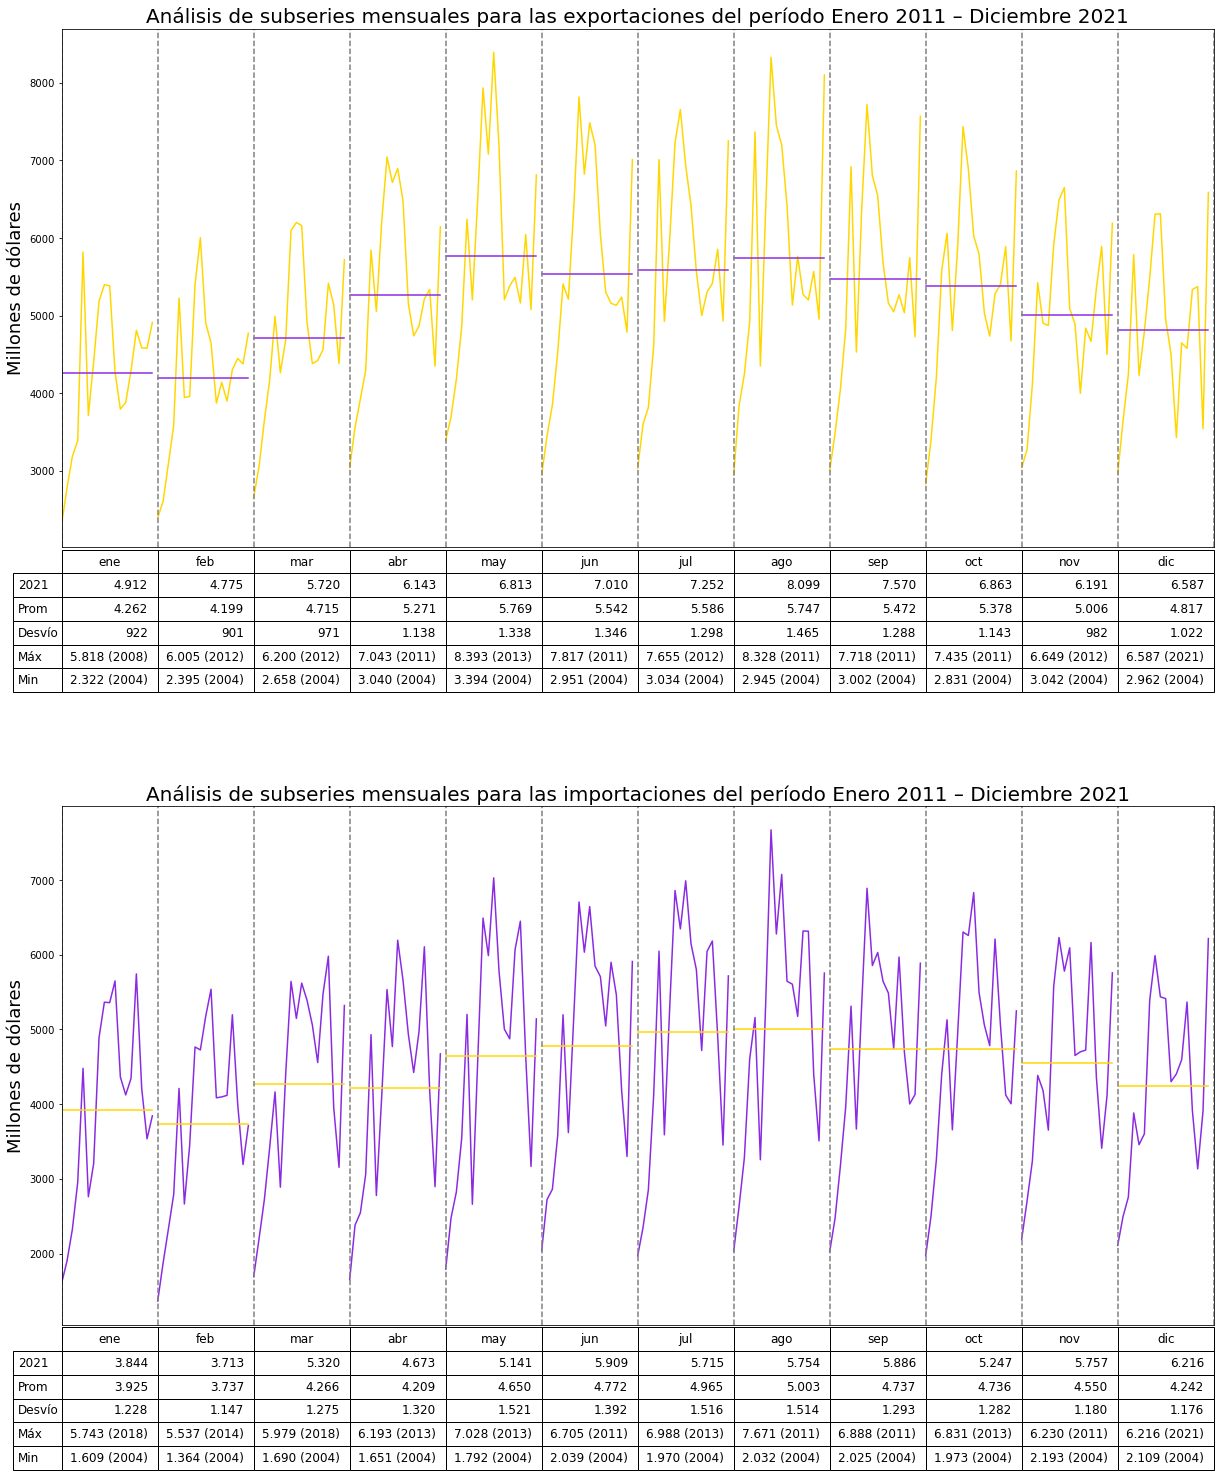

In [117]:
#Valores IMPO y EXPO
fig_valores, (ax_v_expo, ax_v_impo) = plt.subplots(2)
fig_valores.set_size_inches(20,20)

hace_grafo(ax_v_expo, df_estacional.v_expo, df_estacional.v_expo_media, ax_v_impo, df_estacional.v_impo, df_estacional.v_impo_media)

#Algunos ajustes de tamaño de letra etc
ax_v_expo.set_ylabel('Millones de dólares', fontsize = 18)
ax_v_impo.set_ylabel('Millones de dólares', fontsize = 18)
ax_v_expo.set_title(f'Análisis de subseries mensuales para las exportaciones del período Enero {desde} – Diciembre {hasta}', fontsize = 20)

ax_v_impo.set_title(f'Análisis de subseries mensuales para las importaciones del período Enero {desde} – Diciembre {hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)


#Imprimo

plt.show()


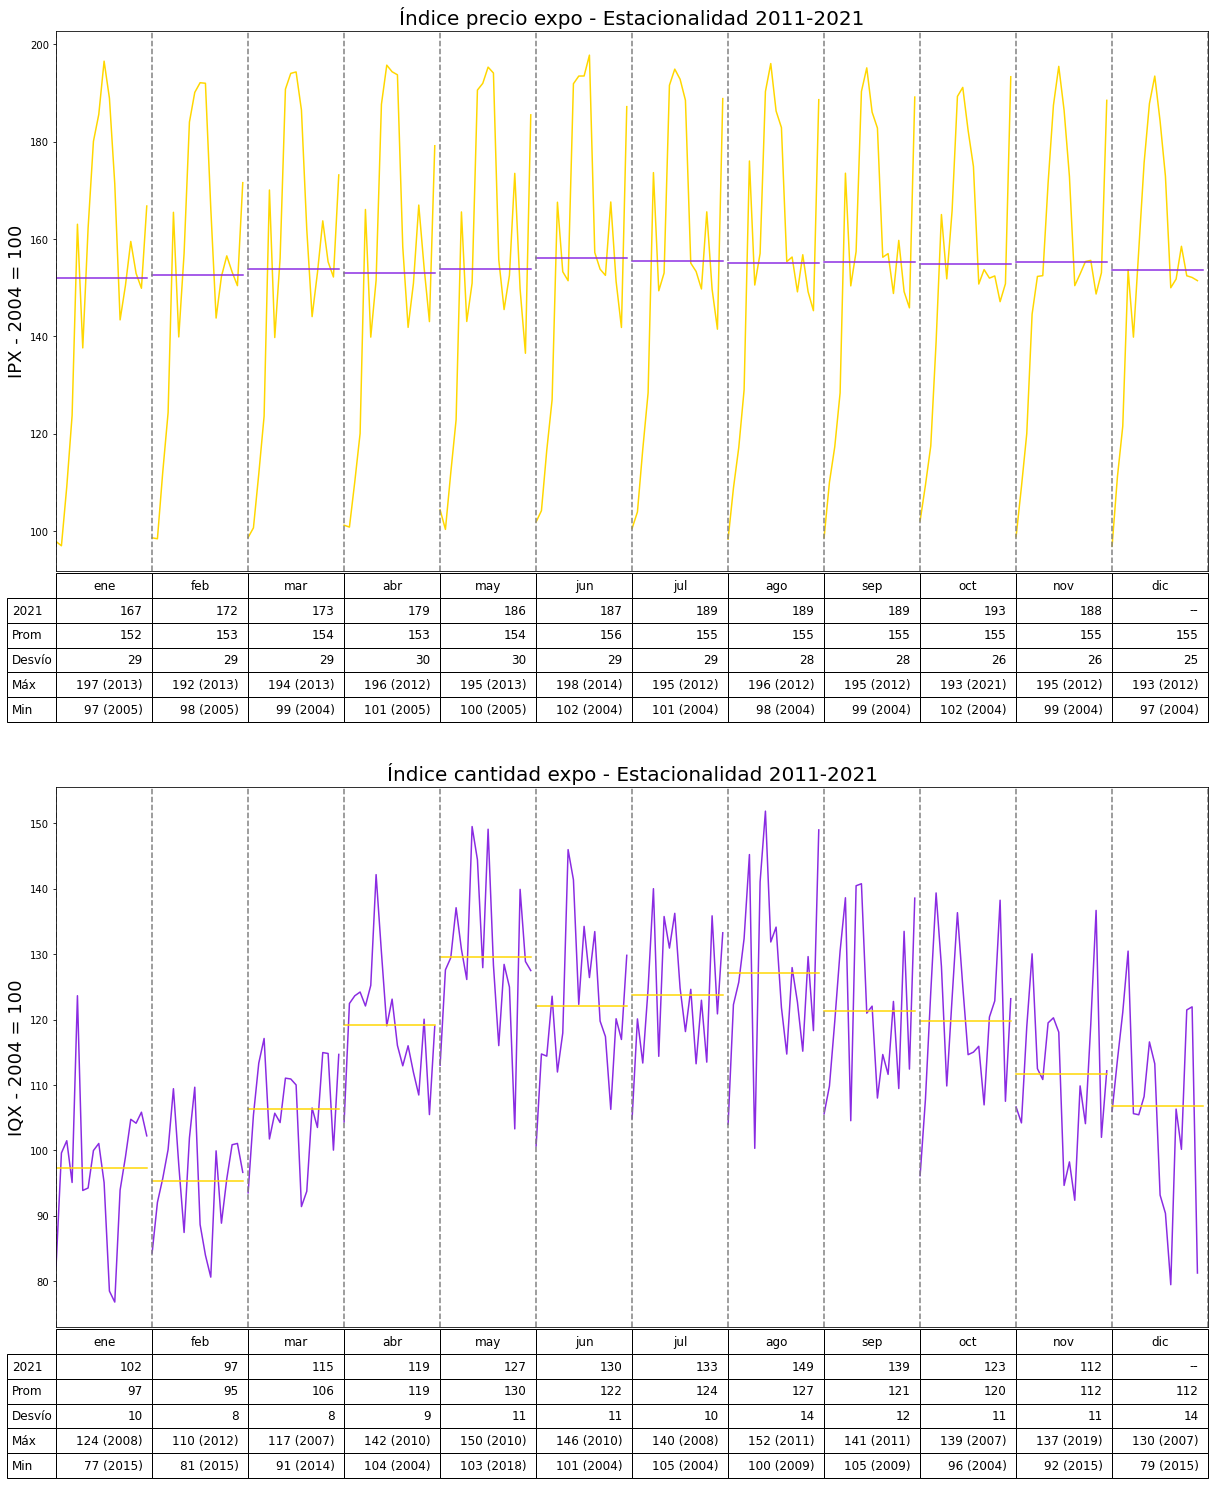

In [118]:
#Precios y cantidades EXPO
#Valores IMPO y EXPO
fig_i_expo, (ax_p_expo, ax_q_expo) = plt.subplots(2)
fig_i_expo.set_size_inches(20,20)

hace_grafo(ax_p_expo, df_estacional.p_expo, df_estacional.p_expo_media, ax_q_expo, df_estacional.q_expo, df_estacional.q_expo_media)

#Algunos ajustes de tamaño de letra etc
ax_p_expo.set_ylabel('IPX - 2004 = 100', fontsize = 18)
ax_q_expo.set_ylabel('IQX - 2004 = 100', fontsize = 18)


ax_p_expo.set_title(f'Índice precio expo - Estacionalidad {desde}-{hasta}', fontsize = 20)

ax_q_expo.set_title(f'Índice cantidad expo - Estacionalidad {desde}-{hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)


#Imprimo

plt.show()

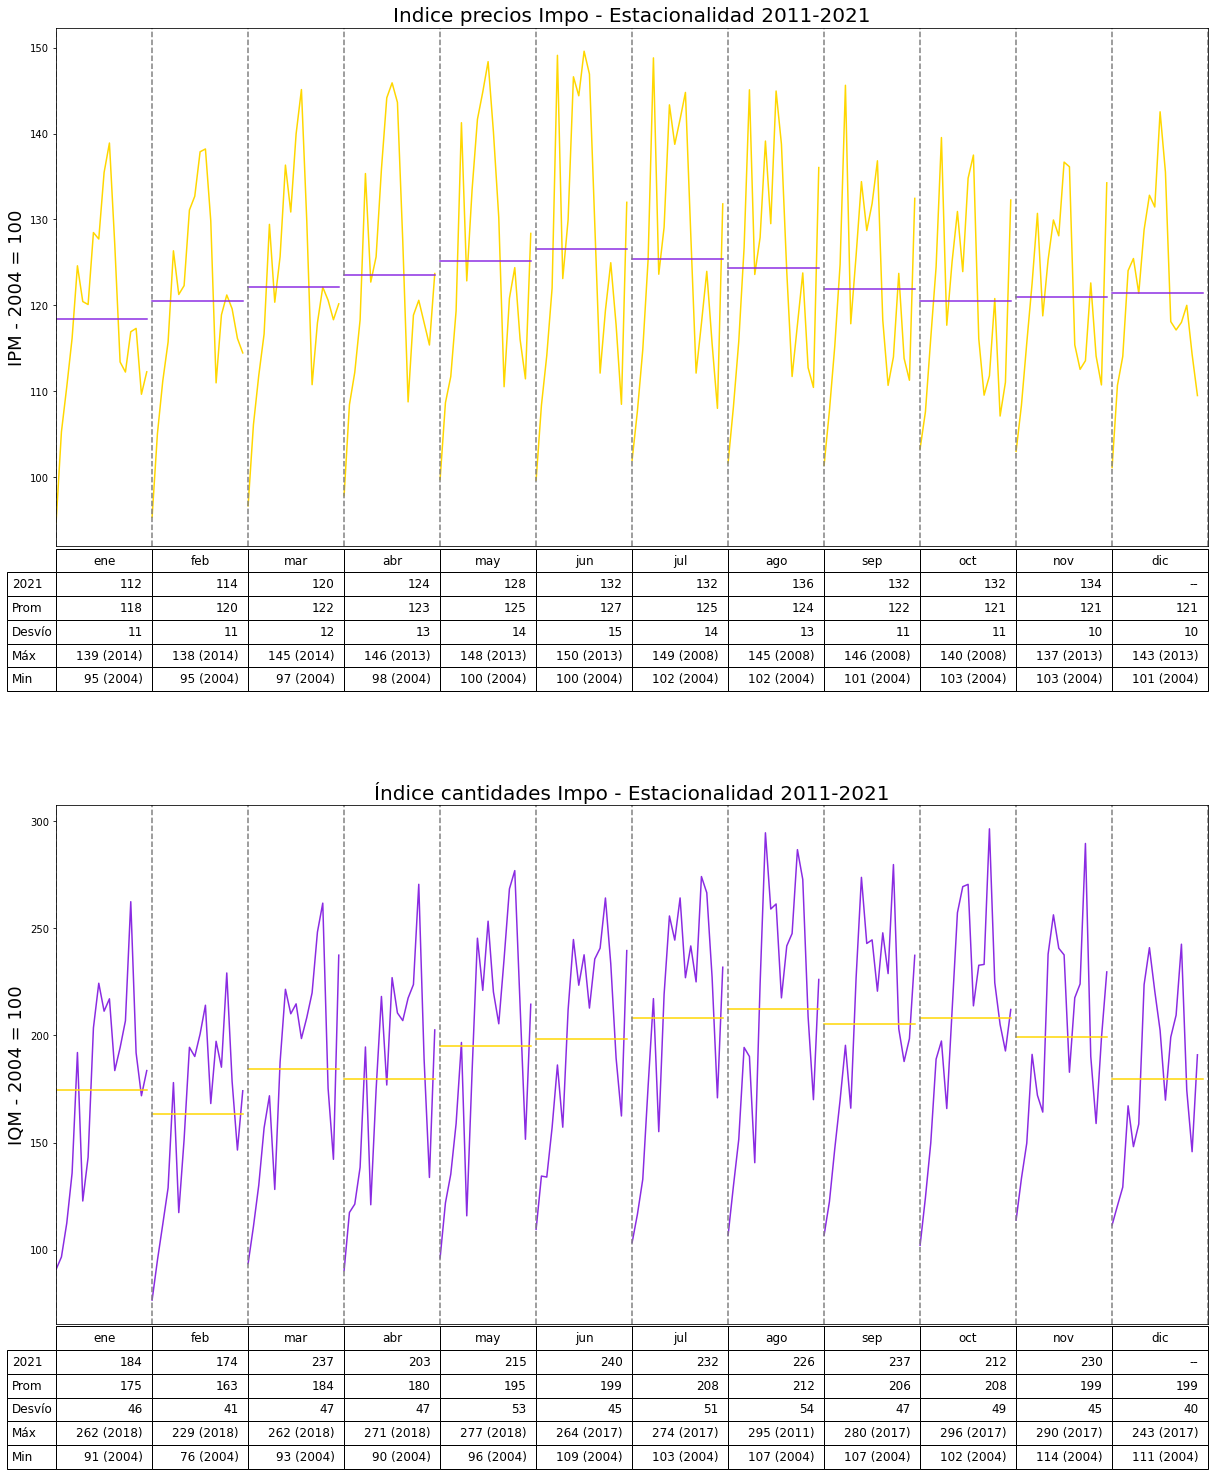

In [119]:
#Precios y cantidades IMPO

fig_i_impo, (ax_p_impo, ax_q_impo) = plt.subplots(2)
fig_i_impo.set_size_inches(20,20)

hace_grafo(ax_p_impo, df_estacional.p_impo, df_estacional.p_impo_media, ax_q_impo, df_estacional.q_impo, df_estacional.q_impo_media)

#Algunos ajustes de tamaño de letra etc
ax_p_impo.set_ylabel('IPM - 2004 = 100', fontsize = 18)
ax_q_impo.set_ylabel('IQM - 2004 = 100', fontsize = 18)
ax_p_impo.set_title(f'Indice precios Impo - Estacionalidad {desde}-{hasta}', fontsize = 20)

ax_q_impo.set_title(f'Índice cantidades Impo - Estacionalidad {desde}-{hasta}', fontsize = 20)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.5)


#Imprimo

plt.show()

In [120]:
fig_valores.savefig('./outputs/Estacionalidad de valores Impo-Expo.pdf', transparent=False, dpi=300, bbox_inches = "tight")
fig_i_expo.savefig('./outputs/Estacionalidad de IPX-IQX.pdf', transparent=False,dpi=300, bbox_inches = "tight")
fig_i_impo.savefig('./outputs/Estacionalidad de IPM-IQM.pdf', transparent=False,dpi=300, bbox_inches = "tight")